<div style="border:solid green 2px; padding: 20px">
<b>Hi Michael! My name is Paul and I am here to improve your project together</b>
    


You can find my comments in <font color='green'>green</font>, <font color='orange'>orange</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment: </b> if I can give some recommendations
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment:</b> if the block requires some corrections. Work can't be accepted with red comments.
</div>

Please, do not move or delete my comments - it helps us move faster =)
    
To make a dialog let's use this style for your remarks:

<div class="alert alert-info"> <b>Student's comment:</b> Just like this</div>

To make a similar block - double click on the previous row, copy and edit it in places you are changing ;) 

### <font color='red'>General feedback</font>
You've done a really good job on the project! It was really interesting to check it and I see a lot of cool blocks =) Especially liked your detailed and precise conclusions, code style and tricks. There are a couple of issues, that are too important to be ignored - find all my colored blocks below and don't forget to correct existing conclusions - they are too exact to be rewritten! :) Come back soon!

### <font color='red'>General feedback 2</font>
Hi Michael! Thank you for your improvements! On the whole, your project is looking good. I've left some comments, which could help you to upgrade the project accuracy, do not forget to change some conclusions ;) One more time and you'll have it!

### <font color='red'>General feedback 3</font>
Hi Michael! I know, you are surpised - the project is too good for the 3rd rewiew, looks like something went wrong and I've recieved uncorrected version. Anyway - I've tried to describe the way of thinking from the potential customer point of view. Don't worry, we are almost there =)


### <font color='red'>General feedback 4</font>
Hi Michael! Thank you for the patience! Now everything is perfect and the project easily could be the part of your portfolio :) Keep up the good work, and good luck on the next sprint!

<h1>Integrated Project 1: Video Games release and global sales over the years</h1>
<br> </br>

<b>Objective: identify patterns that determine
whether a game succeeds or not. This will allow you to spot potential big winners and
plan advertising campaigns.</b>


##  Data file and the general information

In [2]:
#importing dataframes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


games=pd.read_csv('/datasets/games.csv')

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


##  Preparing the data

In [4]:
#making column names lowercase

games.columns= games.columns.str.lower()

In [5]:
#Finding null values
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<div class="alert alert-block alert-success">
<b>Reviewer's comment:</b>

Thank you for the script check before sending the project, I appreciate it!

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment:</b>

Here is one little ~and important issue~, we don't know anything about duplicates ¯\_(ツ)_/¯

</div>

<blockquote> I added the duplicate analysis below</blockquote>

In [6]:
games.duplicated().sum()

0

In [7]:
games.duplicated('name').sum()

5155

In [8]:
games.duplicated('na_sales').sum()

16313

<div class="alert alert-info"> <b> It appears that the the duplicates are on the "name" column, which makes sense because that column contains the same of some games released by multiple platforms.   </b></div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment 2:</b>

That's great you added this block! What about `.duplicated()` - this method returns True or False, when we use `count` we get just a dataframe length, let's try `sum`

</div>


<blockquote> I added .duplicated().sum() instead of just .count() I can now see the difference in duplicated values in different columns </blockquote>

The values appear not be missing at random. The missing values on the "critic_score" "User_Score" and "Ra"ting" column tend to come from year_of_release prior to 2008. Some of these games were released before electronic data collection was used.

I replaced "tbd" with Zeros because it looks like everytime it appears,  a sales value is also missing in one of the sales regions. By filling it with Zero now, it easier to select those values and exclude them from our study or replace them in the future if necessary. 

In [9]:
#checking data types

games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [10]:
games.dropna(subset= ['name','genre'], inplace = True)

In [11]:
games.dropna(subset =['year_of_release'], inplace =True)
games['year_of_release']=games['year_of_release'].astype(int)

<div class="alert alert-block alert-warning">
<b>Reviewer's comment:</b>

Suggest 0 isn't the best value to fill nans in year column, our dataset quite new if you count from the birth of Christ ;)

</div>


<blockquote> I dropped the null values in the 'year_of_release' column</blockquote>

In [12]:
critic_score_mean = games['critic_score'].mean()
games['critic_score'].fillna(value=games['critic_score'].mean(), inplace=True)

<div class="alert alert-block alert-warning">
<b>Reviewer's comment:</b>

I think this column has a strong correaltion with 'genre' ;) - you can use this to increase analysis accuracy

</div>


In [13]:
games['user_score'] = np.where(games['user_score']== 'tbd', np.nan, games['user_score'].astype('object'))
games.iloc[300]

name               Namco Museum: 50th Anniversary
platform                                      PS2
year_of_release                              2005
genre                                        Misc
na_sales                                     2.08
eu_sales                                     1.35
jp_sales                                        0
other_sales                                  0.54
critic_score                                   61
user_score                                    NaN
rating                                       E10+
Name: 301, dtype: object

In [14]:
games['user_score']=games['user_score'].astype(float)
#user_score_mean = games['user_score'].mean()
#games['user_score'].fillna(value=games['user_score'].mean(), inplace=True)

<div class="alert alert-info"> As required, I changed 'tbd using np.nan below. I selected one column that had 'tbd' before the conversion - just to confirm </div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment:</b>

Really glad to see you've solved the problem of 'tbd' =)

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment:</b>
But what shall we do if 'tbd' means that score was calculating at the moment or the game had just a few high marks? In such case, it'll be appropriate to replace 'tbd' with np.nan and use parameters in `.astype()`

</div>


<blockquote> I made the changes above </blockquote>

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2:</b>

Nice to see `np.where()` function in the project

</div>


In [15]:
games['rating'].fillna(value='unknown', inplace=True)

In [16]:
games.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         8981
rating                0
dtype: int64

In [17]:
games.head(8)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.994363,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.994363,NaN,unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,68.994363,NaN,unknown
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.000000,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.000000,6.6,E


--Explanation: 

<ul>
<li>The 'name' and 'genre' columns only have a few null values, it is best to drop those rows.</li>
<li> ( year_of_release missing 269 rows- that doesn't seem to alarming in this case). I dropped the rows with the null values - I Then coverted all the values  in the column to integers</li>
<li>I replaced the missing values in 'critic_score' by the mean of the existing values in that column. </li>
<li><b>user_score NaN values were left as is...following the required note to change "tbd' to np.nan .</b> </li>
<li>I replaced the missing values in 'rating by' "unknown"</li>
</ul>

In [18]:
# calculating the total sales

games['total_sales']= games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

<div class="alert alert-block alert-success">
<b>Reviewer's comment:</b>

Everything is correct here

</div>


In [19]:
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.994363,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.994363,NaN,unknown,31.38


##  Analyzing the data

<b>Let's take a Look at how many games were released in different years</b>

In [20]:
games.groupby('year_of_release')['platform'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: platform, dtype: int64

From 1980 to 1993 video games released were pretty constant at a lower rate. With a basic search we can actually explain why it doubled in 1994 - That's when PlayStation console was realeased for the first time (December 3, 1994)  - it started growing since then because that's the area when the "console release wars" started between Microsoft Xbox, Sony Playstation, and  Nintendo. But then it exponentially increased in 2005-2006 because that's when portable video game consoles were released:   Nintendo DS and Sony PSP. There is a release decline from 2012 to 2016 - maybe the integration of video games into smart phones in Androids and Iphones has to do something with it.  

2006 was a record year in console release <a> href="https://www.cbsnews.com/news/2006-a-record-year-for-video-game-industry/" ></a>

<b>let's take a look at how sales varied from platform to platform. Choosing the platforms with the greatest total sales and building a distribution based on data for each year. Finding
platforms that used to be popular but now have zero sales </b>

In [21]:
popular= games.pivot_table(values='total_sales', index='year_of_release', columns='platform', aggfunc='count')

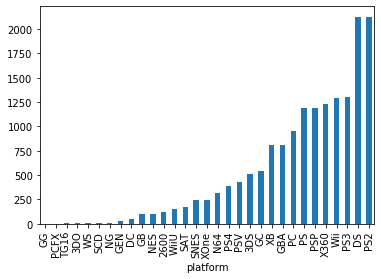

In [22]:
games.groupby('platform')['total_sales'].count().sort_values().plot(kind='bar')
plt.show( )

This bar plot shows which platforms have more sales overtime. The giants in the gaming industry lead the charts.  

This does not come at a surprise for someone who is familiar with the video game progression timeline( also any google search will do). The PlayStation2 was a real game changer in terms of graphics with maximum 1280×1024 pixels for the first time in 2000. The Nindendo DS was the first portable console with Dual screens back in 2004. PSP and PC have always been constant in sales.PS4 and Xbox had a slow start partly due to the 2006-2008 economic recession. 

In [23]:
# Choosing the platforms with the greatest total sales and build a distribution based on data for each year.

filter_per_year= games.groupby(['year_of_release', 'platform'])['total_sales'].sum()
filter_per_year.head(10)

year_of_release  platform
1980             2600        11.38
1981             2600        35.68
1982             2600        28.88
1983             2600         5.84
                 NES         10.96
1984             2600         0.27
                 NES         50.08
1985             2600         0.45
                 DS           0.02
                 NES         53.44
Name: total_sales, dtype: float64

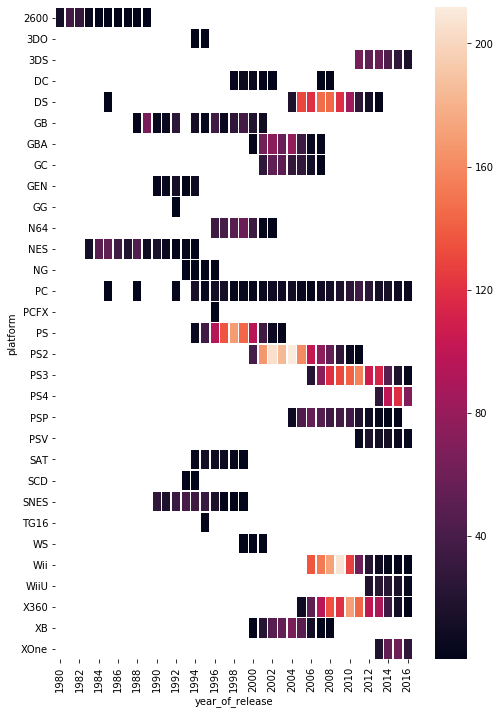

In [24]:
#Finding the platforms that used to be popular but now have zero sales.

import warnings
warnings.filterwarnings('ignore')

filter_per_year= games.groupby(['platform', 'year_of_release'])['total_sales'].agg({'total_sales': 'sum'}).reset_index()

Platform_timeline = pd.pivot_table(filter_per_year , values ='total_sales',
                       index=['platform'], columns = 'year_of_release')

plt.figure(figsize =(8,12))
sns.heatmap(Platform_timeline, linewidths=.5);

The heatmap above shows which platforms are fading overtime based on total sales and release years. <b>2600 - NES and SNES</b> were very popular in the early days of video games- many other platforms really never made it very far ( they will be left our of our analysis)- From 1981 to 1991 -  Only a few pioneers in the game - From 1991 -2004 early days platforms unable to bring significant innovation are slowly exiting the market. From 2004 - to present: it's pretty much a 3 company show, <b>Microsoft,  Sony and Nintendo </b> establish leadership around the world in release and sales.

In [26]:
#sorting data by relevance 


games_2 = games[games['year_of_release'] >=2015]

<div class="alert alert-info"></br>  I added comment V.3</br>
    To make more accurate predictions for 2017, I chose to work with 'year_of_release 2015 & 2016
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment 3:</b>

Hi, Michael! I know, you are confused, and so am I - 2015 year is a quite good border to cut the dataset and I don't know why do you declined it. 

For example, it is meanless to use the data about PS2 sales at 2007, cuz this platform had disappeared in 2011 without any influence on sales in 2017 ¯\_(ツ)_ The same situation with games, which are in the and of their lifecycle and going to be dropped out at 2015-2017 -  demand is too low to make tangible revenue.

</div>


<div class="alert alert-block alert-warning">
<b>Reviewer's comment 3:</b>

That is my proposal and if we had no information about the typical time of use - your hypothesis - the most appropriate alternative =)

</div>


<div class="alert alert-info">
<b>Reply to comment 3:</b> <br>  
Ah! it all makes sense now... Study only the platforms that will be present in 2017. Got it. Honestly, I thought about it at first - But I was just trying to show the overall lifecycle of the platforms. I appreciate the clarification. I made the correction and updated the comment below </div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment:</b>

Here is a little issue: the relevant dataset has to be used to make a forecast for sales in 2017. Let's try to determine the length of the platform lifecycle, check those who are only in the 1st half, and stay actual at 2017

</div>


<div class="alert alert-info"> I added the missing task below with comment</div>

In [27]:
#creating a data frame that takes games_2 and computes the platform and the total sales from year_of_release >=2006

platform_over_years= games_2.groupby(['year_of_release', 'platform']) ['total_sales'].sum().sort_values(ascending=False)
platform_over_years = platform_over_years.unstack(1)
lifecycle=(~platform_over_years.isnull()).sum()

In [28]:
lifecycle.nlargest(8)

platform
3DS     2
PC      2
PS3     2
PS4     2
PSV     2
Wii     2
WiiU    2
X360    2
dtype: int64

#printing the length of the top platforms lifecycle based on the total sales ( previously determined)

lifecycle[['PThis red block regards to `Augmented and virtual reality is upon us - what's popular today may not be popular 10 years for now.` It is an awesome conclusion, and I fully agree with it =) 
and still don't understand why did you choose 2004 to cut our dataset? We both think that gamedev is moving too fast to look at 13 years old data about non-existing in 2017 platforms =) I'd like to suggest cutting the dataset on year when all actual in 2017 platforms existed. You've calculated the life cycle for some platforms, this time we can conclude, that we have to avoid making a bet on the 2nd part of the platform lifecycle.
Example: Wii appeared in 2006 and according to the length of a typical platform's life duration it has no sense to take the data for Wii (and peers) in 2017. What about XOne (from 2013), in case the platform had no success, in 2017 it was only 4 years old - it's only beginning if we believe it'll be actual about 10-12 years.S2','DS','PS3','Wii','X360', 'PSP','PC']]

<div class="alert alert-info"> I revised the release year used to segment the dataset. I picked 2015 as the release year to ensure that all the platforms to be analyzed in 2017. There is no need to include plaftforms with a shorter lifespan .<br>

The Top platforms that have been consistent in both release and sales since then are 3DS- PC- PS3 - PS4 - PSV - Wii - WiiU and X360 These are the platforms we need to study to make 2017 predictions.</div>

In [28]:
#finding the platforms that are leading in sales

top_platforms=games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_10= top_platforms.head(9)
top_10


platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
Name: total_sales, dtype: float64

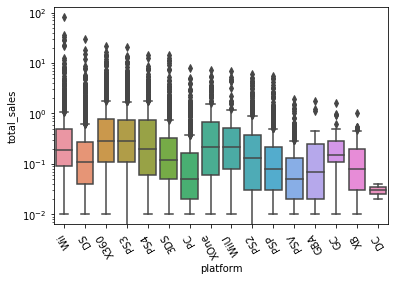

In [29]:
#Build a box plot for the global sales of all games, broken down by platform

sns.boxplot(data=games_2, x='platform', y='total_sales')
plt.yscale('log')
plt.xticks(rotation=120)
plt.show()

The boxplot shows that there is not a huge difference when it comes to the sales mean of these platforms overtime. This can be easily explained by the fact that one platform maybe leading the sales one year but the next year's sales is snatched by another platform. This is a constant release war between the major platforms. 

In [30]:
#Taking a look at how user and professional reviews affect sales for one popular platform

xbox_console= games.loc[games['platform']== 'XOne']

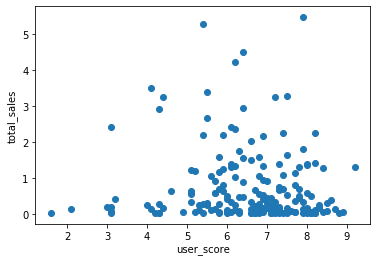

In [31]:
plt.scatter(xbox_console['user_score'], xbox_console['total_sales'])
plt.xlabel('user_score')
plt.ylabel('total_sales')
plt.show()

In [32]:
#Let's analyze the of correlation 
xbox_console.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.242667,-0.194925,-0.127050,-0.243414,0.047968,0.079481,-0.239183
na_sales,-0.242667,1.000000,0.765367,0.425725,0.988088,0.347305,-0.069318,0.970433
eu_sales,-0.194925,0.765367,1.000000,0.421071,0.852986,0.356711,-0.055911,0.898045
jp_sales,-0.127050,0.425725,0.421071,1.000000,0.441717,0.205969,0.069591,0.452701
other_sales,-0.243414,0.988088,0.852986,0.441717,1.000000,0.366315,-0.069645,0.995238
critic_score,0.047968,0.347305,0.356711,0.205969,0.366315,1.000000,0.438019,0.371477
user_score,0.079481,-0.069318,-0.055911,0.069591,-0.069645,0.438019,1.000000,-0.068925
total_sales,-0.239183,0.970433,0.898045,0.452701,0.995238,0.371477,-0.068925,1.000000


<div class="alert alert-info"> <b>From both figures above, we can conclude that there is not a correlation between the user score and total sales. However, it appears that "critic_score" and total_sales have somewhat a moderate uphill (positive) relationship with a coefficient ~ 0.37   </b></div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment:</b>

It's great you've printed these figures

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment:</b>

I see 0.37 correlation - if +1 star brings +0.37 million - the correlation is really positive and strong =)

</div>


<blockquote> I updated the comment above</blockquote>

In [33]:
#comparing the sales of the same game name on  3 other platforms.

compare_games=games.groupby(['name']).filter(lambda x: x['platform'].count() >=3)

In [34]:
#first, let's find the game names that are sold on 3 different platforms.

compare_games_2=games.groupby(['name']).filter(lambda x: x['name'].count() >=3)
compare_games_2.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.2,M,21.05
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.000000,9.0,M,20.81
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.000000,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,68.994363,NaN,unknown,14.63
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.000000,6.3,M,14.62
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.000000,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.000000,4.8,M,13.68
36,Call of Duty: Modern Warfare 2,X360,2009,Shooter,8.52,3.59,0.08,1.28,94.000000,6.3,M,13.47
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.000000,3.2,M,13.33


In [35]:
#Now let's analyze the desired game name
compare_games[compare_games['name']=='Call of Duty: Modern Warfare 3']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
1040,Call of Duty: Modern Warfare 3,PC,2011,Shooter,0.41,0.98,0.00,0.32,78.0,2.5,M,1.71
2500,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,0.55,0.20,0.00,0.08,70.0,1.8,M,0.83


In [36]:
# Another classic game analysis 
compare_games[compare_games['name']=='Grand Theft Auto V']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


This must be the best part of this entire study, getting to know which platform sold more classic games in a given year. This is very informative. We can repeat this operation with any given classic game. 

## Creating a user profile for each region

In [37]:
# let's take a look at top platforms per regions
top_region= games.groupby('platform')[['na_sales', 'eu_sales','jp_sales','other_sales']].sum().sort_values(by=['na_sales', 'eu_sales','jp_sales','other_sales'],ascending=False)
top_5_region= top_region.head(5)
top_5_region

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
X360,595.74,268.32,12.30,84.88
PS2,572.92,332.63,137.54,190.47
Wii,486.87,258.32,68.28,77.71
PS3,390.13,327.21,79.41,134.59
DS,380.31,188.41,175.02,59.04


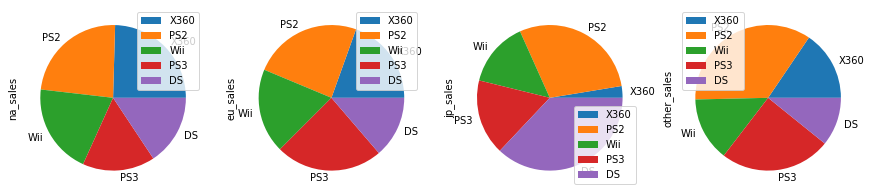

In [38]:
# Describe variations in their market shares from region to region

top_5_region.plot.pie(subplots=True, figsize=(15, 15));

<div class="alert alert-block alert-warning">
<b>Reviewer's comment:</b>

Usually we try to avoid this type of plots, it is hard to read and see difference, but the table above helps =)

</div>


The visualization above shows the market shares of the top platforms from regions to regions. In north America, the most predominant market, Xbox 360 and PS2 lead the way. The distribution looks even in Europe while Nintendo DS leads in Japan (no surprise there) - PS2 and PS3 take on the rest of the world.

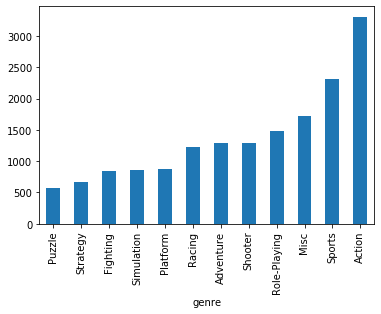

In [39]:
# let's find the top genres

games.groupby('genre')['total_sales'].count().sort_values().plot(kind='bar')
plt.show( )


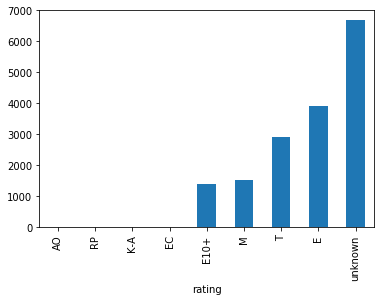

In [40]:
#Do ESRB ratings affect sales in individual regions?
games.groupby('rating')['total_sales'].count().sort_values().plot(kind='bar')
plt.show()

The ESRB data is missing alot of values - this may lead to inacurate analysis. However, based on the visualizations above, it may be safe to say that the ratings do not affect the sales. The first chart shows that Action games sold the most. Action games are also the most rated M for Mature. The rating E for Everyone seems to be leading in the second chart because most genres fit that category ( Puzzle - Sports - Platform - Strategy - Role-Playing- Misc- Simulation)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment:</b>

Let's upgrade the project by adding info about rating by regions, by the task

</div>


<div class="alert alert-info"> <b> I added the missing task below </b></div>

In [41]:
# info about rating by regions

rating_by_region= games.groupby('rating')[['na_sales', 'eu_sales','jp_sales','other_sales']].sum().sort_values(by=['na_sales', 'eu_sales','jp_sales','other_sales'],ascending=False)
rating_by_region

,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
E,1274.24,703.87,197.96,231.54
unknown,1225.84,609.65,836.74,149.87
T,747.60,421.79,150.70,152.99
M,742.89,480.00,63.58,176.06
E10+,345.50,183.35,40.20,71.93
K-A,2.56,0.27,1.46,0.03
EC,1.53,0.11,0.00,0.11
AO,1.26,0.61,0.00,0.09
RP,0.00,0.03,0.00,0.01


Rating E for everyone is leading the chart across all regions. The rating T for Teens is second considering the fact that the unknown ratings could be updated later ( they represent a huge number - we will not drop those values at this time) <br><br> Another interesting found is that Japan does not consume a lot of Mature related video games (mostly Bloody and violent) the ratings M and E10+ are significantly low in that region. 

## hypotheses Testing

### HYPOTHESIS 1 : Testing IF Average user ratings of the Xbox One and PC platforms are the same: 

H0: Average user ratings of the Xbox One and PC platforms are the same<br>
H1: Average user ratings of the Xbox One and PC platforms are NOT the same<br>
alpha: 0.05

In [42]:
#let's determine the mean and standard deviation

games.groupby('platform')['user_score'].describe().loc[['XOne', 'PC']]

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
XOne,182.0,6.521429,1.380941,1.6,5.8,6.8,7.5,9.2
PC,755.0,7.065960,1.532718,1.4,6.2,7.5,8.2,9.3


In [43]:
#tsting the hypothesis

from scipy.stats import ttest_ind
from scipy import stats


print(stats.ttest_ind(games.loc[games['platform']=='XOne', 'user_score'].dropna(),
                      games.loc[games['platform']=='PC' , 'user_score'].dropna(),
                      equal_var = False))

ttest, pval = ttest_ind(games.loc[games['platform']=='XOne', 'user_score'].dropna(),
                        games.loc[games['platform']=='PC' , 'user_score'].dropna())
print("P-value is",pval)
if(pval < 0.05):
    print("Reject the Null hypothesis (Average user ratings of the Xbox One and PC platforms are NOT the same) ")
else:
    print("Accept the Null hypothesis (Average user ratings of the Xbox One and PC platforms are the same)")


Ttest_indResult(statistic=-4.671113961085972, pvalue=4.5385802963771776e-06)
P-value is 1.3037979620149106e-05
Reject the Null hypothesis (Average user ratings of the Xbox One and PC platforms are NOT the same) 


<div class="alert alert-block alert-success">
<b>Reviewer's comment:</b>

Thank you for a great test! Nice to see you used `equal_var` parameter

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment:</b>

Earlier we've calculated std, 1.81 and 2.10, this means variance differs too...

I've attached the link, the article could help to understand the order: check distribution - select test - check test requirements - describe H0&H1 - test - conclusion (reject H1/H0) - what it means
    
https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

</div>



<div class="alert alert-info"> <b> I appreciate you dropping the link ( Good read!). I think the Mann-Whitney U Test applies to this scenario - we are looking for a statistical significance test for two independent samples drawn from a population with the same distribution.<br>
    I changed the equal_var to False  </b></div>

Although they are almost the same values, PC seems to be ahead.

### HYPOTHESIS 2 : Testing IF Average user ratings for the Action and Sports genres are different.

H0: Average user ratings for the Action and Sports genres ARE DIFFERENT<br>
H1: Average user ratings for the Action and Sports genres ARE THE SAME<br>
alpha = 0.05

In [44]:
games.groupby('genre')['user_score'].describe().loc[['Action', 'Sports']]


,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,1796.0,7.058129,1.423901,0.3,6.3,7.4,8.1,9.5
Sports,1081.0,6.951434,1.619585,0.2,6.1,7.4,8.1,9.5


<div class="alert alert-block alert-warning">
<b>Reviewer's comment:</b>

We have no need to import packages every time - the 1st cell is enough ;)

</div>


In [45]:
from scipy.stats import ttest_ind
from scipy import stats


print(stats.ttest_ind(games.loc[games['genre']=='Action', 'user_score'].dropna(),
                     games.loc[games['genre']=='Sports', 'user_score'].dropna(),
                     equal_var = True))

ttest, pval = ttest_ind(games.loc[games['genre']=='Action', 'user_score'].dropna(),
                        games.loc[games['genre']=='Sports', 'user_score'].dropna())
print("P-value is",pval)
if(pval < 0.05):
    print("Reject the Null hypothesis (Average user ratings for the Action and Sports genres ARE THE SAME) ")
else:
    print("Accept the Null hypothesis (Average user ratings for the Action and Sports genres ARE DIFFERENT)")


Ttest_indResult(statistic=1.8472797735322193, pvalue=0.06480928064420527)
P-value is 0.06480928064420527
Accept the Null hypothesis (Average user ratings for the Action and Sports genres ARE DIFFERENT)


The .describe() method shows that the values are exatly the same and 50% - In addition if you elimate the decimals without rounding the mean values are the same. <br>

## General Conclusion

Working with video games sales data is very exciting. The data provided was missing some data but not too critical to impact the overall required analysis which is to identify patterns that determine whether a game succeeds or not.<br>

At the end of the analysis, I can say with confidence that Microsoft, Sony and Nintendo will continue the new platform and game release wars for a while with their top consoles: the PlayStations series, the XBOX series, and the Nintendos series. The data provided for the study is a historical data, we can see a pattern but we cannot be certain that the trend will continue. Some platforms were really popular at one point in time but disappeared throughout the years, some platforms had a very short lifespan. The reason why it is difficult to use historical data to predict which platforms will thrive is due to the fact that  creativity and innovation are what drive the growth. In addition, external factors like  recessions , pandemics , Inclement weather affect the sales.  This generation benefits from Online retailers like Amazon, Ebay, Best Buy, Walmart, Target ( the previous gaming companies did not have this advantage - they exited the market). Online gaming is gaining proportions as more and more users have access to high speed internet. Augmented and virtual reality is upon us - what's popular today may not be popular 10 years for now. The enviroment is constantly changing. I would recommend a short term marketing strategy. 



<div class="alert alert-block alert-danger">
<b>Reviewer's comment 2:</b>

This red block regards to `Augmented and virtual reality is upon us - what's popular today may not be popular 10 years for now.` It is an awesome conclusion, and I fully agree with it =) 
and still don't understand why did you choose 2004 to cut our dataset? We both think that gamedev is moving too fast to look at 13 years old data about non-existing in 2017 platforms =) I'd like to suggest cutting the dataset on year when all actual in 2017 platforms existed. You've calculated the life cycle for some platforms, this time we can conclude, that we have to avoid making a bet on the 2nd part of the platform lifecycle.
Example: Wii appeared in 2006 and according to the length of a typical platform's life duration it has no sense to take the data for Wii (and peers) in 2017. What about XOne (from 2013), in case the platform had no success, in 2017 it was only 4 years old - it's only beginning if we believe it'll be actual about 10-12 years.
    
</div>


<div class="alert alert-info"> <b> Comment V2 : I made the correction on section 3 </b></div>